In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset from csv file
data_path = os.path.join("..", "data", "ratings_Beauty.csv")
amazon_ratings = pd.read_csv(data_path)

In [3]:
print(f"Dataset shape: {amazon_ratings.shape}")
amazon_ratings.head()

Dataset shape: (2023070, 4)


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [4]:
print(amazon_ratings.info())
print(amazon_ratings.nunique())

# Check for missing values
print(amazon_ratings.isnull().sum())

# Check for duplicate rows
print(f"Number of duplicate rows: {amazon_ratings.duplicated().sum()}")

# Check the n/a values in the dataset
print(amazon_ratings.isna().sum())

# After checking the summary of data. We do not need to remove any rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB
None
UserId       1210271
ProductId     249274
Rating             5
Timestamp       4231
dtype: int64
UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64
Number of duplicate rows: 0
UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64


In [5]:
# Sorting the data based on rating in descending order
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
popular_products.sort_values('Rating', ascending=False).head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Figure size 1200x600 with 0 Axes>

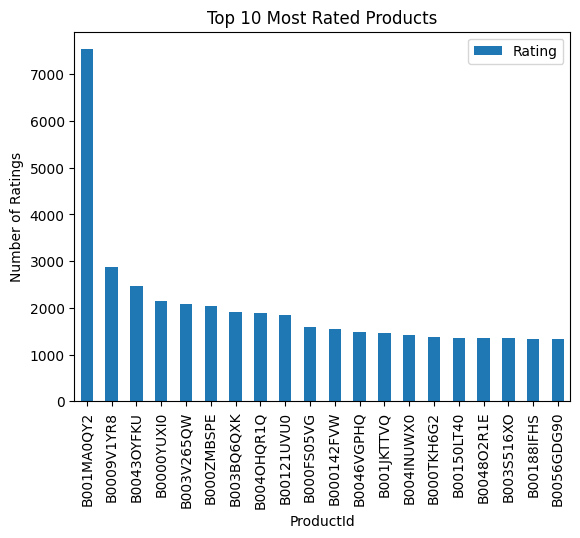

In [6]:
# Visualizing the top 20 most rated products
plt.figure(figsize=(12, 6))
popular_products.sort_values('Rating', ascending=False).head(20).plot(kind='bar')
plt.title('Top 10 Most Rated Products')
plt.xlabel('ProductId')
plt.ylabel('Number of Ratings')
plt.show()

Analysis:

- The above graph gives us the most popular products (arranged in descending order) sold by the business.

- For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc.